# Heart Failure Prediction

ardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

We will create Classification Model Using LogisticRegressin that classify if Person have Heart Failure or No and Use it predict mortality by heart failure With accuracy 88%

## Import

In [29]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make charts in Data Analysis smooth
%matplotlib inline

In [7]:
df = pd.read_csv('heart.csv')

## Explore Data

In [8]:
# Head the Data after reading
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  ...  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289  ...    172              N      0.0       Up             0
1   49   F           NAP        160          180  ...    156              N      1.0     Flat             1
2   37   M           ATA        130          283  ...     98              N      0.0       Up             0
3   48   F           ASY        138          214  ...    108              Y      1.5     Flat             1
4   54   M           NAP        150          195  ...    122              N      0.0       Up             0

[5 rows x 12 columns]

In [9]:
# Display Num of Observation and Features
df.shape

(918, 12)

In [10]:
# Get more info from Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
# Describe Data
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak  HeartDisease
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000    918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364      0.553377
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570      0.497414
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000      0.000000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000      0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000      1.000000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000      1.000000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000      1.000000

In [12]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Check Missing Values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

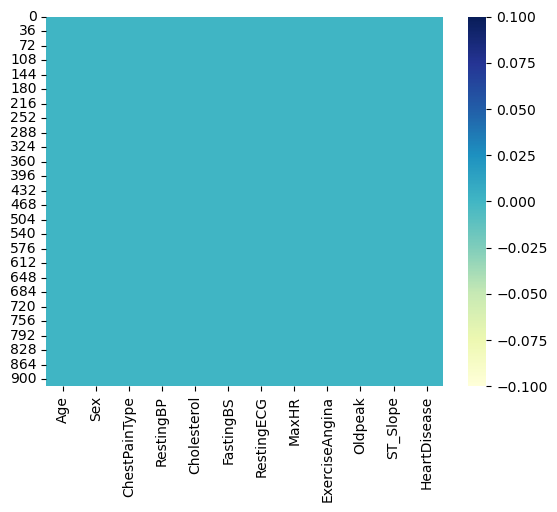

In [31]:
# Visualize Missing values if there are unhead missing values
sns.heatmap(df.isnull(), cmap="YlGnBu")

In [14]:
# Check duplicated rows
df.duplicated().sum()

0

## Data Analysis

In [24]:
# Display Number of `HeartDisease` persons and Not
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

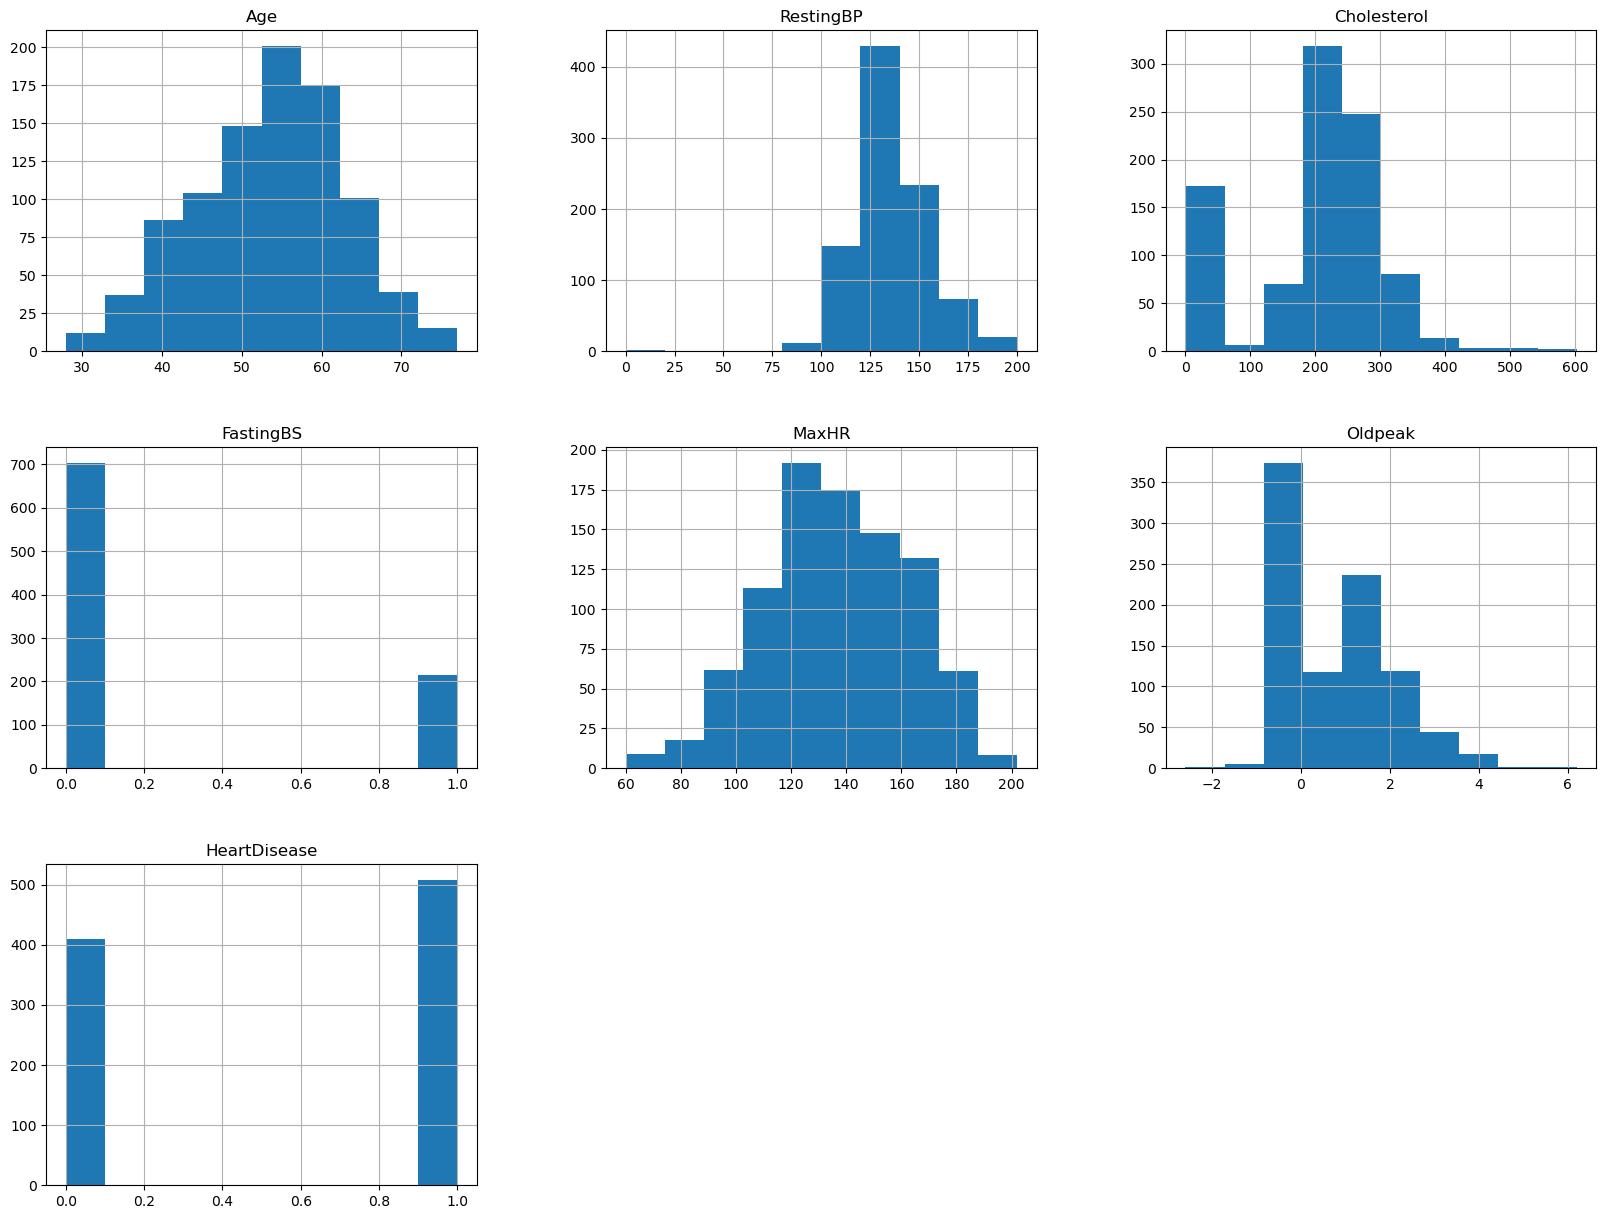

In [30]:
df.hist(figsize=(20, 15))
plt.show()

Text(0.5, 1.0, 'Relation between all features and death')

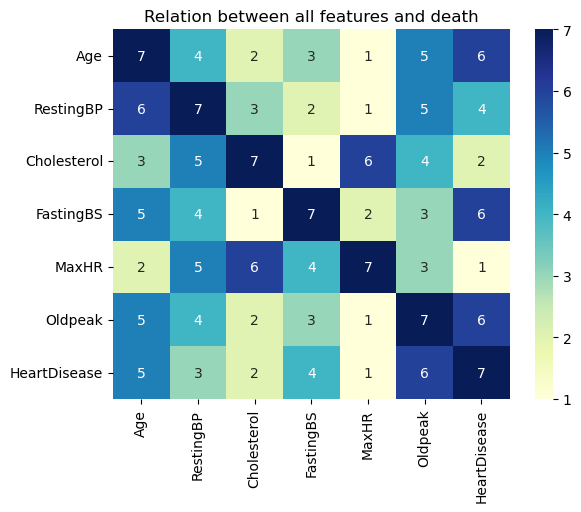

In [35]:
sns.heatmap(df.corr().rank(axis='columns'), cmap="YlGnBu", annot=True)
plt.title('Relation between all features and death')

## Data Preprocessing

In [36]:
# Convert Objects in our data to numerical Data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [40]:
# another Way to Convert from object to numeric
# df['Sex'] = pd.get_dummies(df['Sex'])

F  M
0    0  1
1    1  0
2    0  1
3    1  0
4    0  1
..  .. ..
913  0  1
914  0  1
915  0  1
916  1  0
917  0  1

[918 rows x 2 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
# split Object data from Non object
obj = df.select_dtypes(include='object')
non_obj = df.select_dtypes(exclude='object')

In [44]:
for i in range(0, obj.shape[1]):
    obj.iloc[:,i] = label.fit_transform(obj.iloc[:,i])

In [46]:
df = pd.concat([obj, non_obj], axis=1)

In [47]:
df

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope  ...  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0      1              1           1               0         2  ...          289          0    172      0.0             0
1      0              2           1               0         1  ...          180          0    156      1.0             1
2      1              1           2               0         2  ...          283          0     98      0.0             0
3      0              0           1               1         1  ...          214          0    108      1.5             1
4      1              2           1               0         2  ...          195          0    122      0.0             0
..   ...            ...         ...             ...       ...  ...          ...        ...    ...      ...           ...
913    1              3           1               0         1  ...          264          0    132      1.2             1
914    1              0           1               0         1  ...          193          1    141      3.4             1
915    1              0           1               1         1  ...          131          0    115      1.2             1
916    0              1           0               0         1  ...          236          0    174      0.0             1
917    1              2           1               0         2  ...          175          0    173      0.0             0

[918 rows x 12 columns]

## Base Line Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## Algorithm make model better

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report # To display model's report
from sklearn.metrics import confusion_matrix # To get more better accuracy

### Splitting Data

In [51]:
X = df.drop('HeartDisease', axis=1)
y = df["HeartDisease"]

In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2, test_size=0.8)

In [54]:
# Make def to deal with all algorithms that we will deal with as a models
def all(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print(confusion_matrix(predict, y_test))
    print(classification_report(predict, y_test))

In [55]:
model_1 = KNeighborsClassifier()
all(model_1)

[[204 113]
 [131 287]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       317
           1       0.72      0.69      0.70       418

    accuracy                           0.67       735
   macro avg       0.66      0.67      0.66       735
weighted avg       0.67      0.67      0.67       735



C:\Users\AT\anaconda3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
model_2 = DecisionTreeClassifier()
all(model_2)

[[239  75]
 [ 96 325]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       314
           1       0.81      0.77      0.79       421

    accuracy                           0.77       735
   macro avg       0.76      0.77      0.76       735
weighted avg       0.77      0.77      0.77       735



In [57]:
# The Best Classifiers
model_3 = RandomForestClassifier()
all(model_3)

[[262  38]
 [ 73 362]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       300
           1       0.91      0.83      0.87       435

    accuracy                           0.85       735
   macro avg       0.84      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



In [58]:
model_4 = GradientBoostingClassifier()
all(model_4)

[[253  45]
 [ 82 355]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       298
           1       0.89      0.81      0.85       437

    accuracy                           0.83       735
   macro avg       0.82      0.83      0.82       735
weighted avg       0.83      0.83      0.83       735



In [59]:
model_5 = GaussianNB()
all(model_5)

[[264  57]
 [ 71 343]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       321
           1       0.86      0.83      0.84       414

    accuracy                           0.83       735
   macro avg       0.82      0.83      0.82       735
weighted avg       0.83      0.83      0.83       735



In [60]:
model_6 = SVC()
all(model_6)

[[208  87]
 [127 313]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       295
           1       0.78      0.71      0.75       440

    accuracy                           0.71       735
   macro avg       0.70      0.71      0.70       735
weighted avg       0.72      0.71      0.71       735



In [61]:
model_7 = LogisticRegression()
all(model_7)

[[261  48]
 [ 74 352]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       309
           1       0.88      0.83      0.85       426

    accuracy                           0.83       735
   macro avg       0.83      0.84      0.83       735
weighted avg       0.84      0.83      0.83       735



C:\Users\AT\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There are Different ways to get better than this Score with such as:
- Hyperparameter Tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [64]:
# Perform a randomized search over the hyperparameter grid
rfc_random = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [65]:
# Fit the randomized search to the training data
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, verbose=2)

In [66]:
# Print the best hyperparameters
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 3}

In [67]:
# Print the best Score
rfc_random.best_score_

0.8744744744744745